In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def remap_point(point, h_matrix):
    p_h = np.array([[point]], dtype='float32')
    transformed_point_array = cv2.perspectiveTransform(p_h, h_matrix)
    return transformed_point_array[0][0]


(1000, 500) -> [582.07635 719.45056]


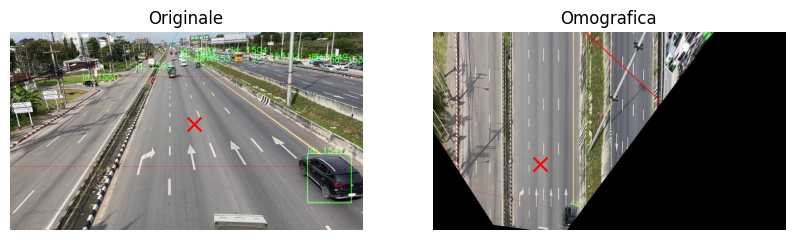

In [3]:
# Carica le immagini per confronto
main_path = "../../"
frame_image = cv2.imread(f'{main_path}homography/experiments/_map_empty.jpg')
frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

# Carica matrice omografica
M = np.load(f'{main_path}homography/matrixes/thai_hom_matrix_last.npy')

height, width, channels = frame_image.shape
warped_image = cv2.warpPerspective(frame_image, M, (width, height))

# Crea punto e punto omografico
random_point = (1000, 500)
transformed_random_point = remap_point(random_point, M)
print(f"{random_point} -> {transformed_random_point}")


# Disegna le due immagini col punto evidenziato
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(frame_image)
axs[0].scatter(random_point[0], random_point[1], color='red', s=100, marker='x')
axs[0].set_title('Originale')
axs[0].axis('off')


axs[1].imshow(warped_image)
axs[1].scatter(transformed_random_point[0], transformed_random_point[1], color='red', s=100, marker='x')
axs[1].set_title('Omografica')
axs[1].axis('off')

plt.show()